In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

# To analyze the sales data provided by the company, we will examine all the column values and break down the sales by gender and year. Based on this analysis, we can share a summary to help the company enhance customer experience and increase their sales or revenue.

In [154]:
dataset=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1;;
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,;Adil;M
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,;Ashir;M
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,;Naimal;F
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,;Ankit;M
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,;Joni;M


In [155]:
start_date = "2021-01-01"
end_date = "2022-12-31"
index_length = 11251
dataset_range= pd.date_range(start=start_date, end=end_date,periods=index_length)
dataset["Date"]=dataset_range
print(dataset.head())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status unnamed1;;                    Date  
0  23952.0     NaN    ;Adil;M 2021-01-01 00:00:00.000  
1  2

In [138]:
dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1;;,Date
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,;Adil;M,2021-01-01 00:00:00.000
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,;Ashir;M,2021-01-01 01:33:18.720
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,;Naimal;F,2021-01-01 03:06:37.440
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,;Ankit;M,2021-01-01 04:39:56.160
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,;Joni;M,2021-01-01 06:13:14.880


In [139]:
dataset['Month']=dataset['Date'].dt.month
dataset['Year']=dataset['Date'].dt.year
(dataset[['Month','Year']])

,Month,Year
0,1,2021
1,1,2021
2,1,2021
3,1,2021
4,1,2021
...,...,...
11246,12,2022
11247,12,2022
11248,12,2022
11249,12,2022


In [140]:
dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1;;,Date,Month,Year
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,;Adil;M,2021-01-01 00:00:00.000,1,2021
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,;Ashir;M,2021-01-01 01:33:18.720,1,2021
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,;Naimal;F,2021-01-01 03:06:37.440,1,2021
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,;Ankit;M,2021-01-01 04:39:56.160,1,2021
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,;Joni;M,2021-01-01 06:13:14.880,1,2021


# Data Cleaning

In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User_ID           11251 non-null  int64         
 1   Cust_name         11251 non-null  object        
 2   Product_ID        11251 non-null  object        
 3   Gender            11251 non-null  object        
 4   Age Group         11251 non-null  object        
 5   Age               11251 non-null  int64         
 6   Marital_Status    11251 non-null  int64         
 7   State             11251 non-null  object        
 8   Zone              11251 non-null  object        
 9   Occupation        11251 non-null  object        
 10  Product_Category  11251 non-null  object        
 11  Orders            11251 non-null  int64         
 12  Amount            11239 non-null  float64       
 13  Status            0 non-null      float64       
 14  unnamed1;;        1125

In [142]:
#Drop Blank Columns
dataset.drop(['Status','unnamed1;;'],axis=1,inplace=True)

In [143]:
dataset.shape

(11251, 16)

In [144]:
dataset.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
Date                 0
Month                0
Year                 0
dtype: int64

In [145]:
#Drop null values
dataset.dropna(inplace=True)

In [146]:
dataset.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
Date                0
Month               0
Year                0
dtype: int64

In [147]:
dataset['Amount']=dataset['Amount'].astype('int')

In [148]:
dataset['Amount'].dtypes

dtype('int32')

In [149]:
dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Date,Month,Year
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,2021-01-01 00:00:00.000,1,2021
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,2021-01-01 01:33:18.720,1,2021
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,2021-01-01 03:06:37.440,1,2021
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912,2021-01-01 04:39:56.160,1,2021
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877,2021-01-01 06:13:14.880,1,2021


In [53]:
#Extract all column names
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Date', 'Month', 'Year'],
      dtype='object')

In [150]:
#describe() method return description of the data in the dataframe(like count, mean, std, mean, max etc.)
dataset.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Date,Month,Year
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000,11239,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553,2021-12-31 20:56:54.434109952,6.524157,2021.499867
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,2021-01-01 00:00:00,1.000000,2021.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000,2021-07-02 19:59:48.480000,4.000000,2021.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000,2021-12-31 21:19:52.320000,7.000000,2021.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000,2022-07-01 22:39:56.160000,10.000000,2022.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,2022-12-31 00:00:00,12.000000,2022.000000
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168,NaN,3.441852,0.500022


In [55]:
dataset.describe(include='object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,1944,4289,1583,2655


In [151]:
#use describe() for specific columns
dataset[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender

In [161]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Date', 'Month', 'Year'],
      dtype='object')

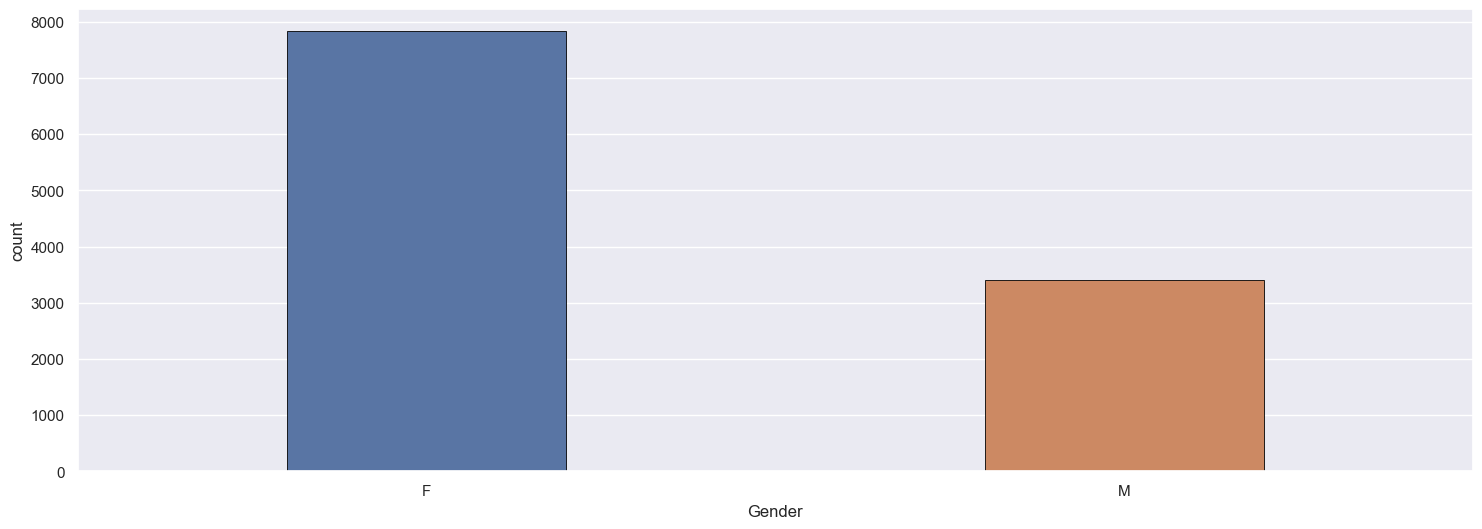

In [152]:
ax=sbn.countplot(x='Gender',data=dataset,width=0.4,linewidth=0.6, edgecolor=["black"])

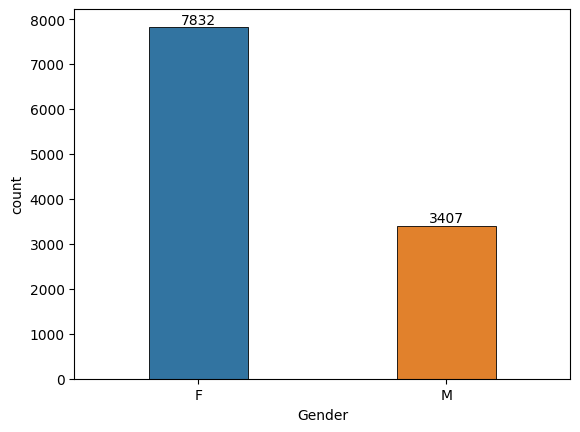

In [45]:
ax=sbn.countplot(x='Gender',data=dataset,width=0.4,linewidth=0.6, edgecolor=["black"])
for bars in ax.containers:
    ax.bar_label(bars)

In [163]:
sales_generation=dataset.groupby('Gender',as_index=False)['Amount'].sum().sort_values(by='Gender',ascending=True)
sales_generation

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

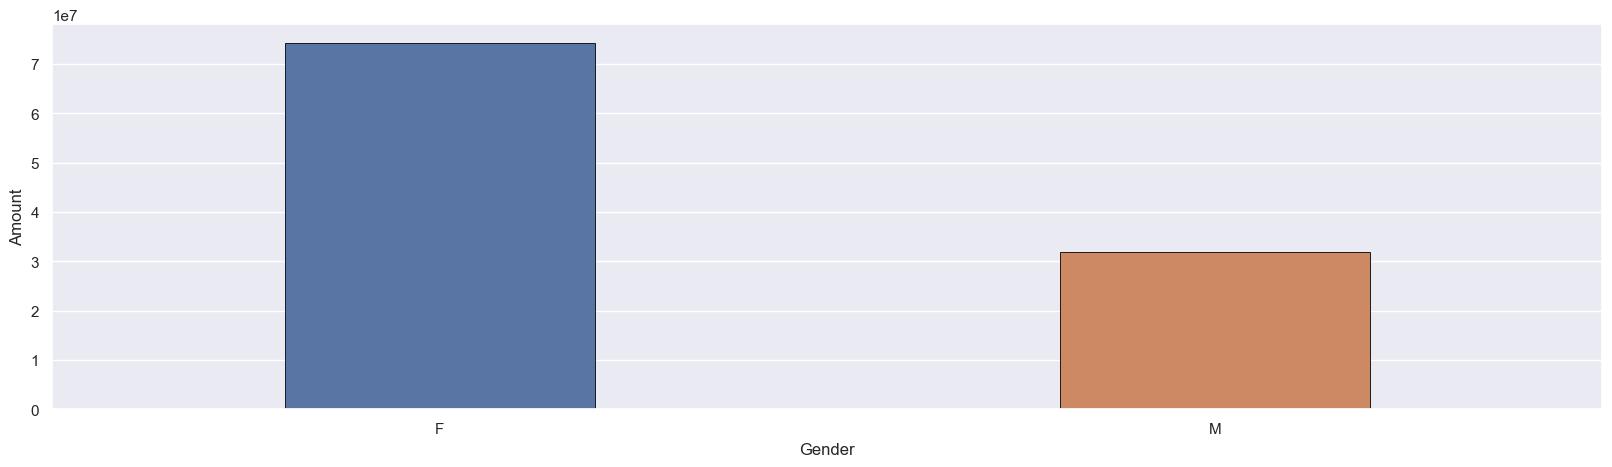

In [169]:
#Total Amount vs Gender
sales_generation=dataset.groupby('Gender',as_index=False)['Amount'].sum().sort_values(by='Gender',ascending=True)
sbn.barplot(x='Gender',y='Amount',data=sales_generation,width=0.4,linewidth=0.6, edgecolor=["black"])

From above graph we can see that most of the buyers are females and even the purchasing power of females are greater than man.

# Age

In [170]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Date', 'Month', 'Year'],
      dtype='object')

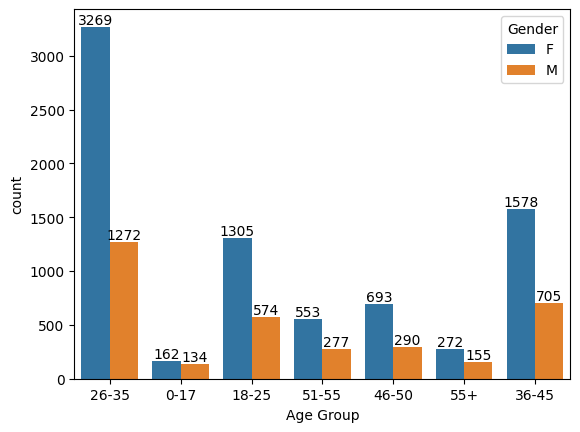

In [22]:
ax=sbn.countplot(x='Age Group',data=dataset,width=0.8,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

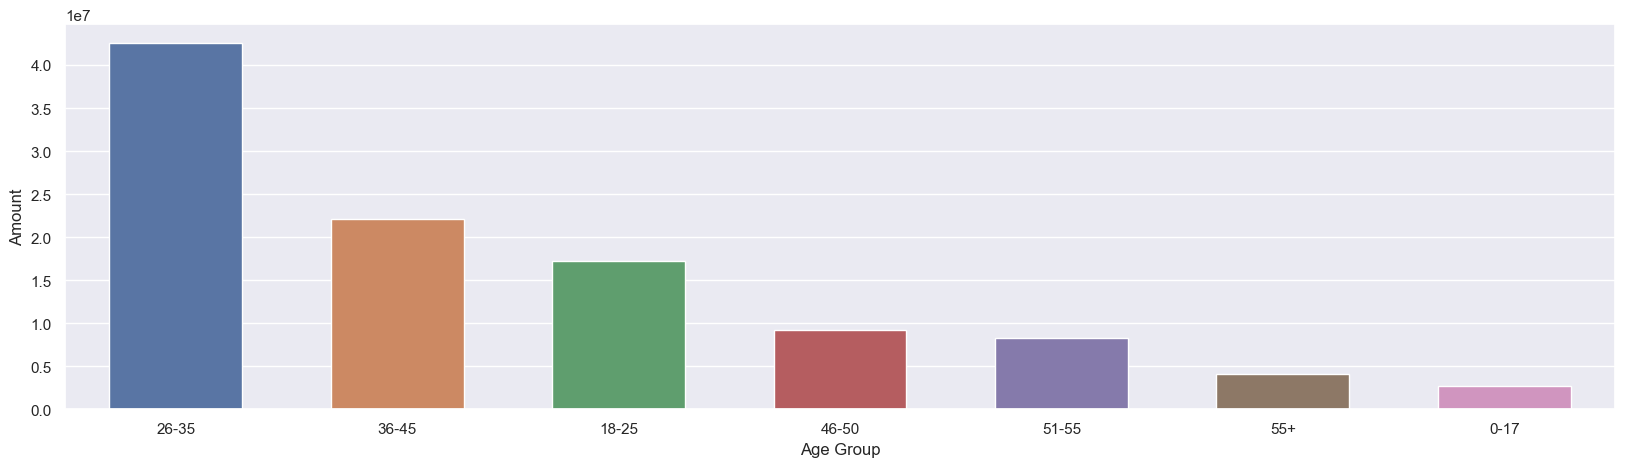

In [175]:
#Total Amount vs Age Group
sales_Age=dataset.groupby('Age Group',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sbn.barplot(x='Age Group',y='Amount',data=sales_Age,width=0.6)

From above graph we can see that most of the buyers are of age group bwtween 26-35 years females


# State

In [176]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Date', 'Month', 'Year'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

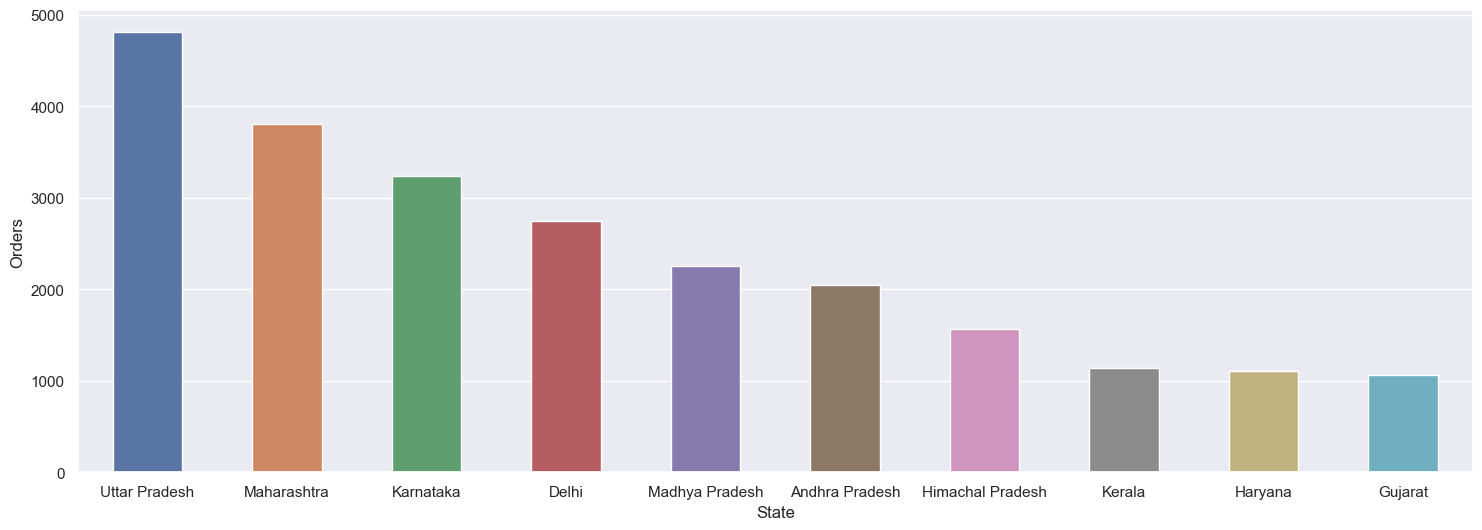

In [177]:
#Total number of orders from top 10 states

sales_state=dataset.groupby('State',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sbn.set(rc={'figure.figsize':(18,6)})
sbn.barplot(x='State',y='Orders',data=sales_state,width=0.5)

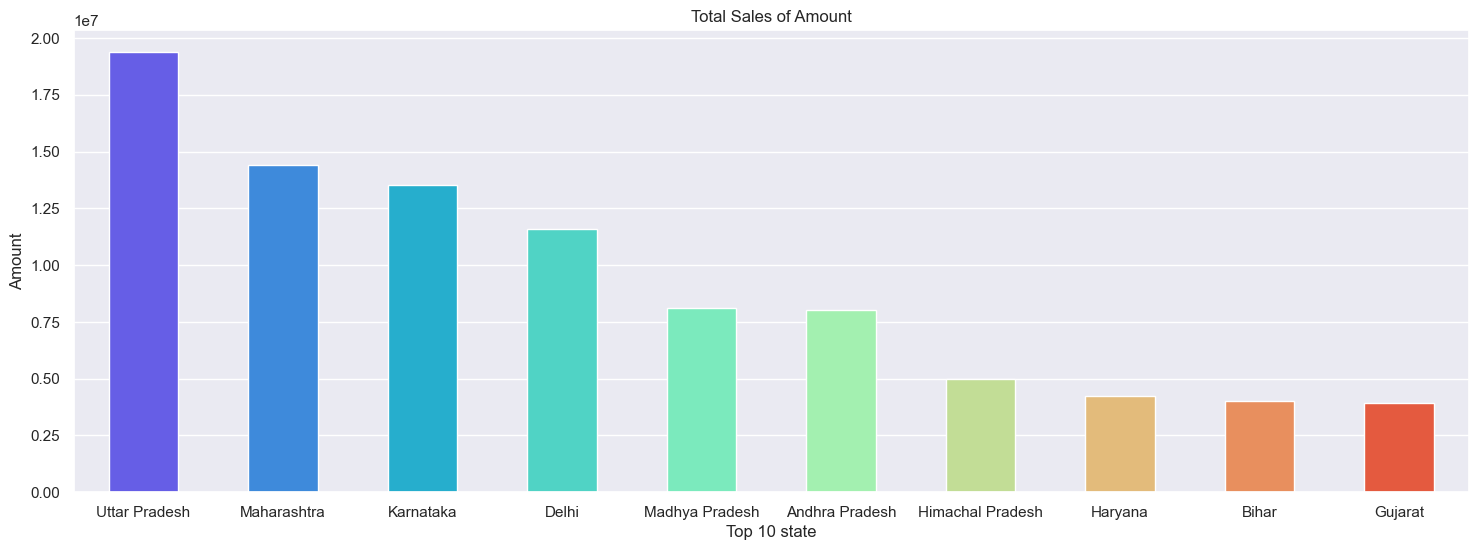

In [23]:
#Total Sales of amount from top 10 states

sales_state=dataset.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sbn.set(rc={'figure.figsize':(18,6)})
sbn.barplot(x='State',y='Amount',data=sales_state,width=0.5,palette='rainbow')

plt.xlabel('Top 10 state')
plt.ylabel('Amount')
plt.title('Total Sales of Amount')
plt.show()

From above graph we can see that most of the orders & total sales/amount are from Uttar pardesh ,Maharashtre, Karnata respectively

# Martial Satatus

In [179]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Date', 'Month', 'Year'],
      dtype='object')

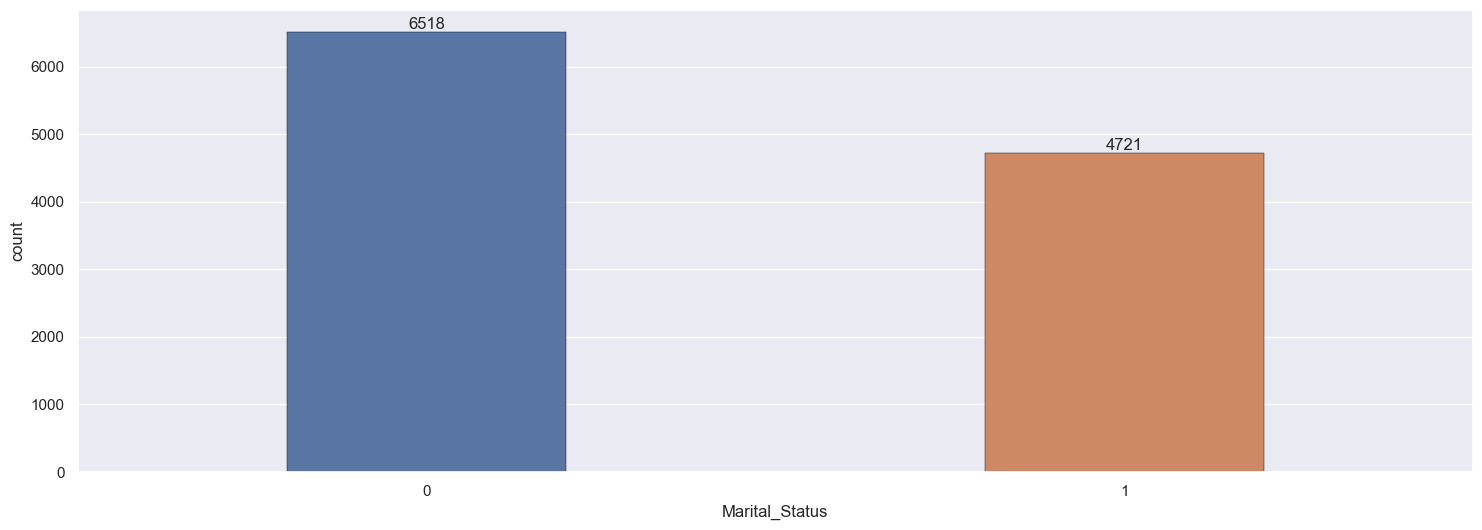

<Figure size 1000x600 with 0 Axes>

In [185]:
az=sbn.countplot(data=dataset, x = 'Marital_Status',width=0.4,linewidth=0.3,edgecolor=['black'] )
sbn.set(rc={'figure.figsize':(17,9)})
plt.figure(figsize=(10,6))
for bars in az.containers:
    az.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

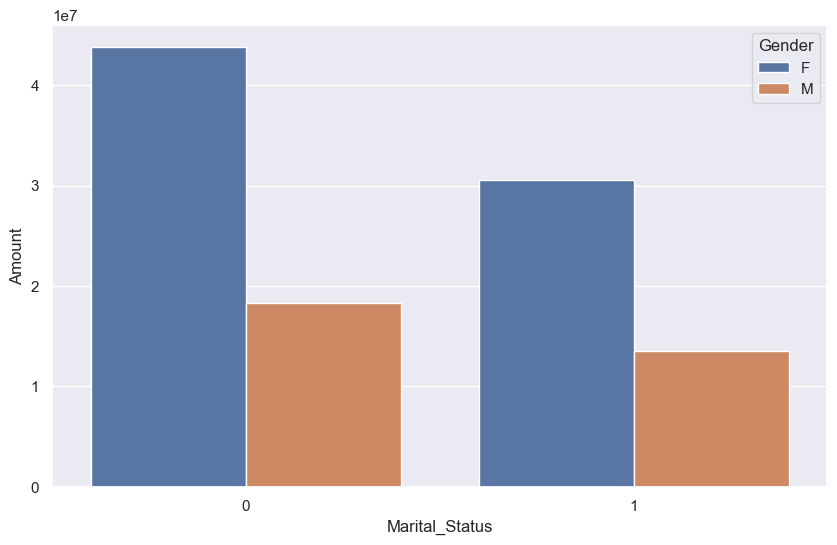

In [73]:
sales_state=dataset.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sbn.set(rc={'figure.figsize':(17,9)})
plt.figure(figsize=(10,6))

sbn.barplot(x='Marital_Status',y='Amount',data=sales_state,hue='Gender')

From above we can see that most of the buyers are married(Women)and they have high purchasing power


# Occupation

In [88]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

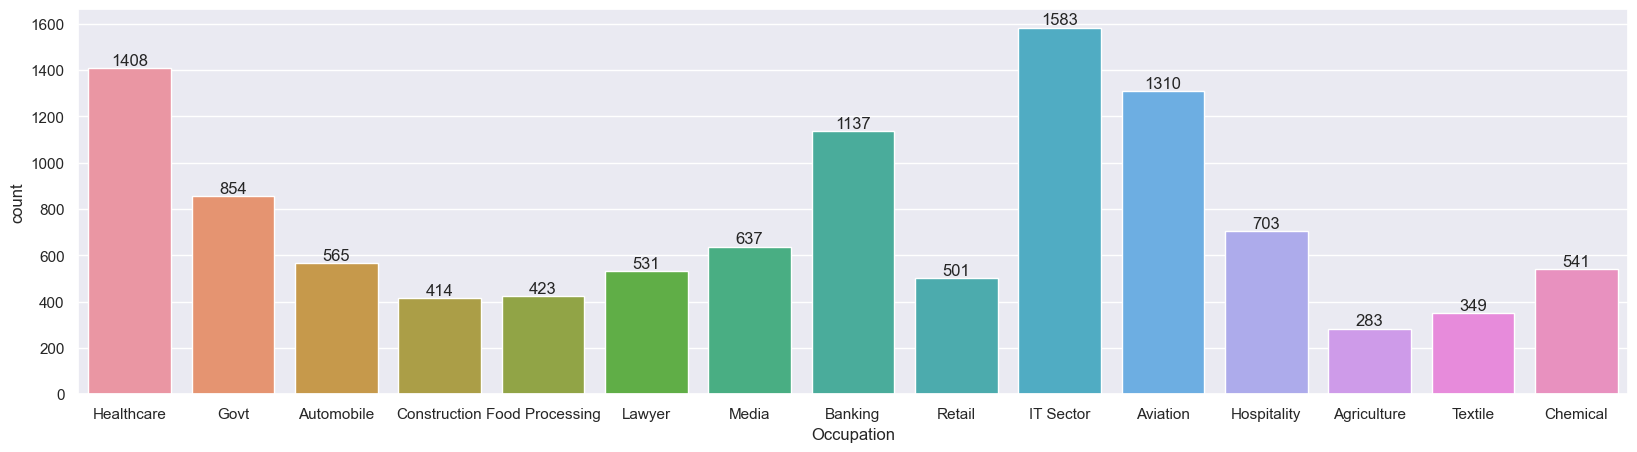

<Figure size 1200x600 with 0 Axes>

In [200]:
ax=sbn.countplot(data=dataset,x = 'Occupation',width=0.8)
sbn.set(rc={'figure.figsize':(17,9)})
plt.figure(figsize=(12,6))
for bars in ax.containers:
    ax.bar_label(bars)

In [24]:
sales_state=dataset.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True).head(10)
sales_state

,Occupation,Gender,Amount
1,Agriculture,M,752605
11,Construction,M,1002089
29,Textile,M,1045220
27,Retail,M,1199475
13,Food Processing,M,1245393
23,Lawyer,M,1598256
3,Automobile,M,1599753
9,Chemical,M,1632352
0,Agriculture,F,1840482
25,Media,M,1920803


<Axes: xlabel='Occupation', ylabel='Amount'>

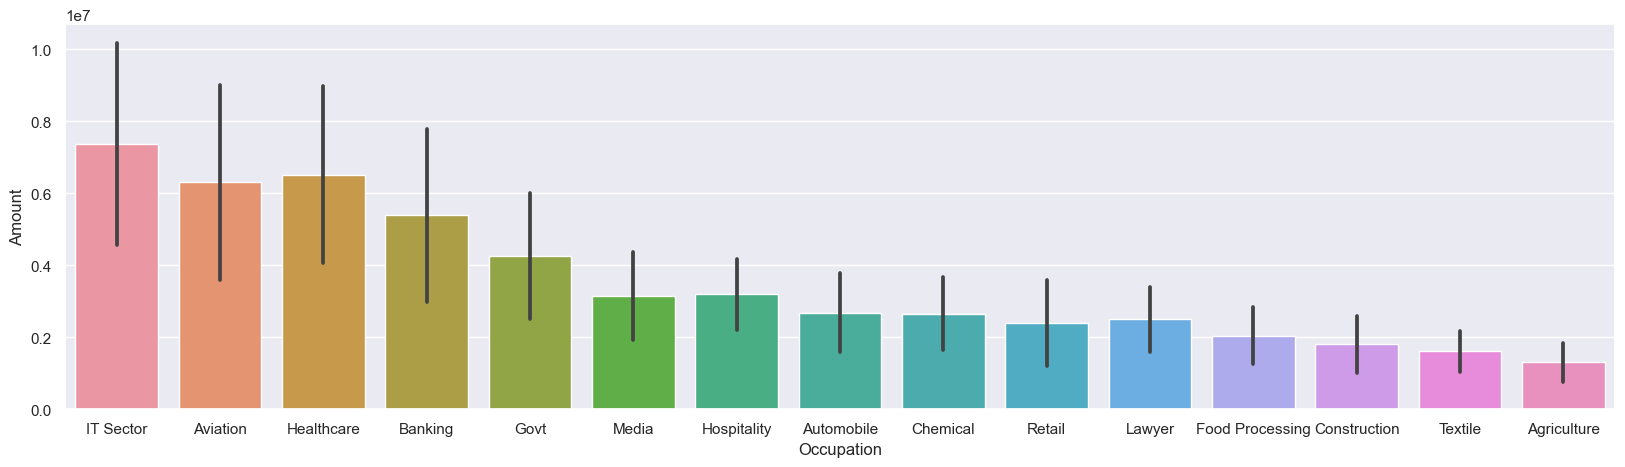

In [195]:
sales_state=dataset.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sbn.set(rc={'figure.figsize':(20,5)})
#plt.figure(figsize=(10,6))

sbn.barplot(x='Occupation',y='Amount',data=sales_state)


From the above graphs we can see that most of the buyers are working in IT,Healthcare and Aviation sector


# Product Category


In [196]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Date', 'Month', 'Year'],
      dtype='object')

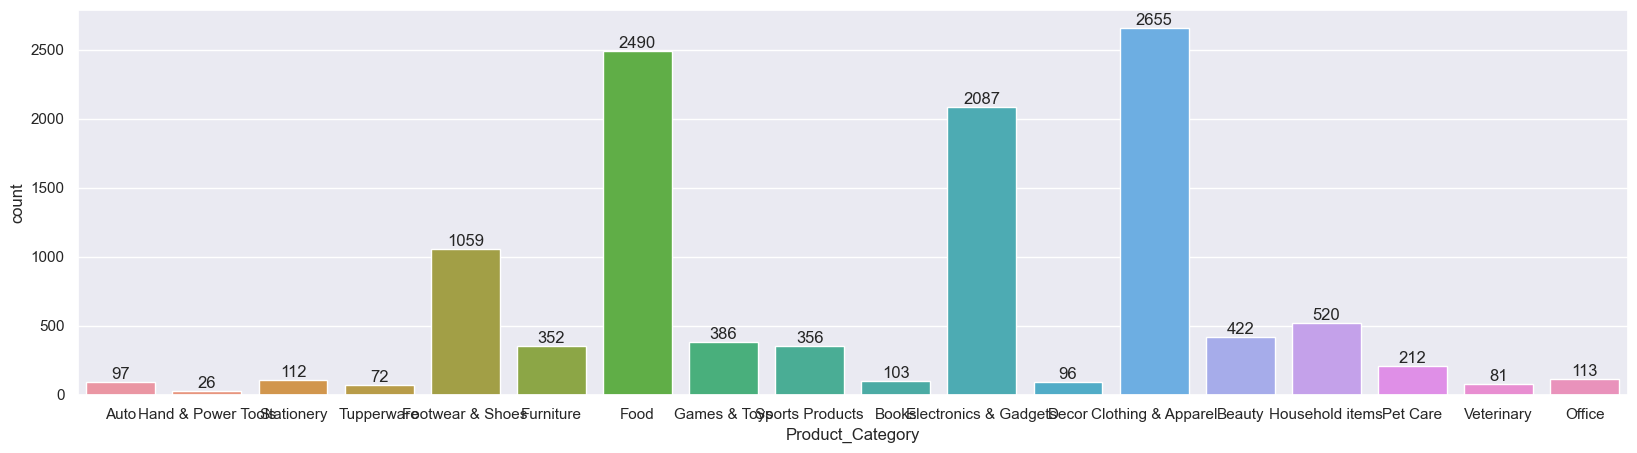

In [197]:
#Count of orders
sbn.set(rc={'figure.figsize':(20,5)})
ax=sbn.countplot(data=dataset,x = 'Product_Category')
#plt.figure(figsize=(12,6))
for bars in ax.containers:
    ax.bar_label(bars)

In [198]:
sales_state=dataset.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_state

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


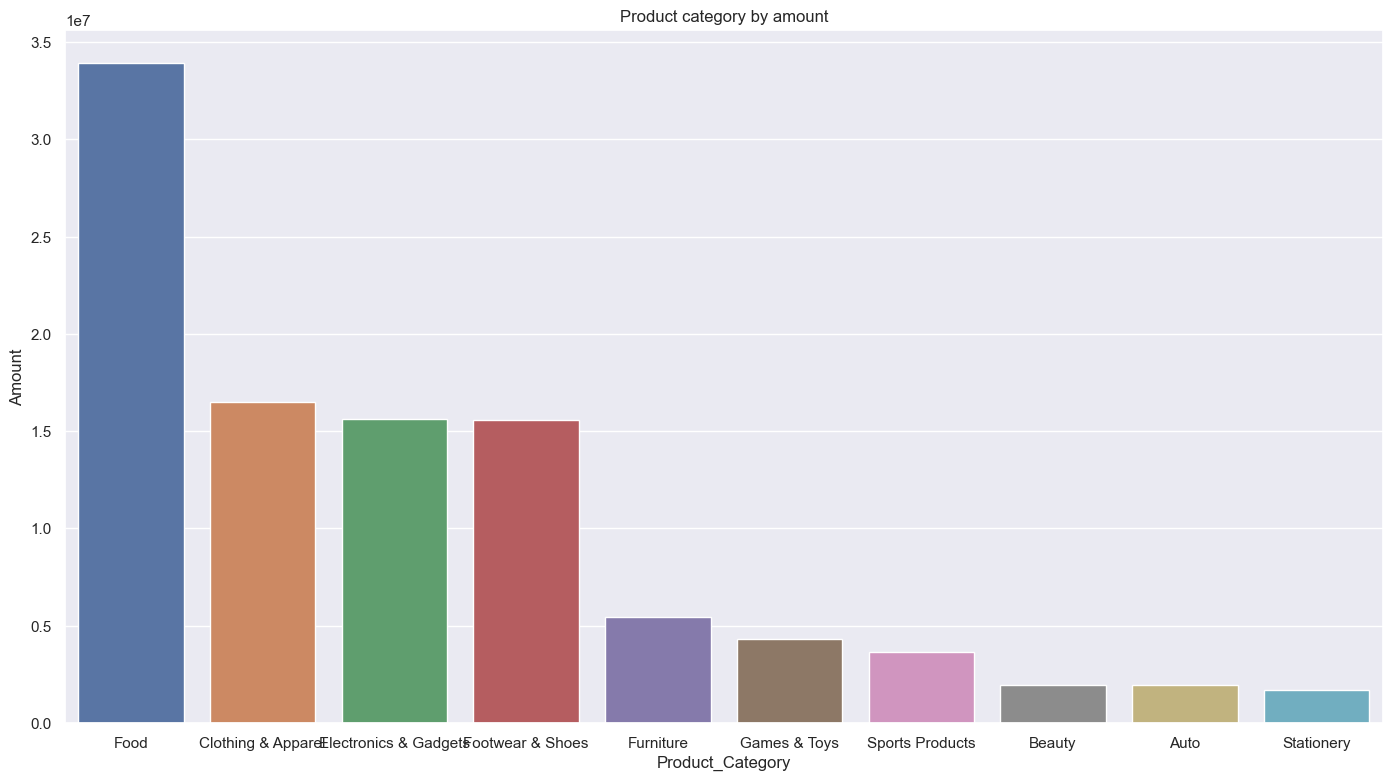

In [213]:
sales_state=dataset.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sbn.barplot(data=sales_state,x='Product_Category',y='Amount')
plt.title('Product category by amount')
plt.show()


"From above graphs we can see that most of the sold products are from Food, Clothing, category"

In [206]:
sales_state=dataset.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sales_state

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


<Axes: xlabel='Product_ID', ylabel='Orders'>

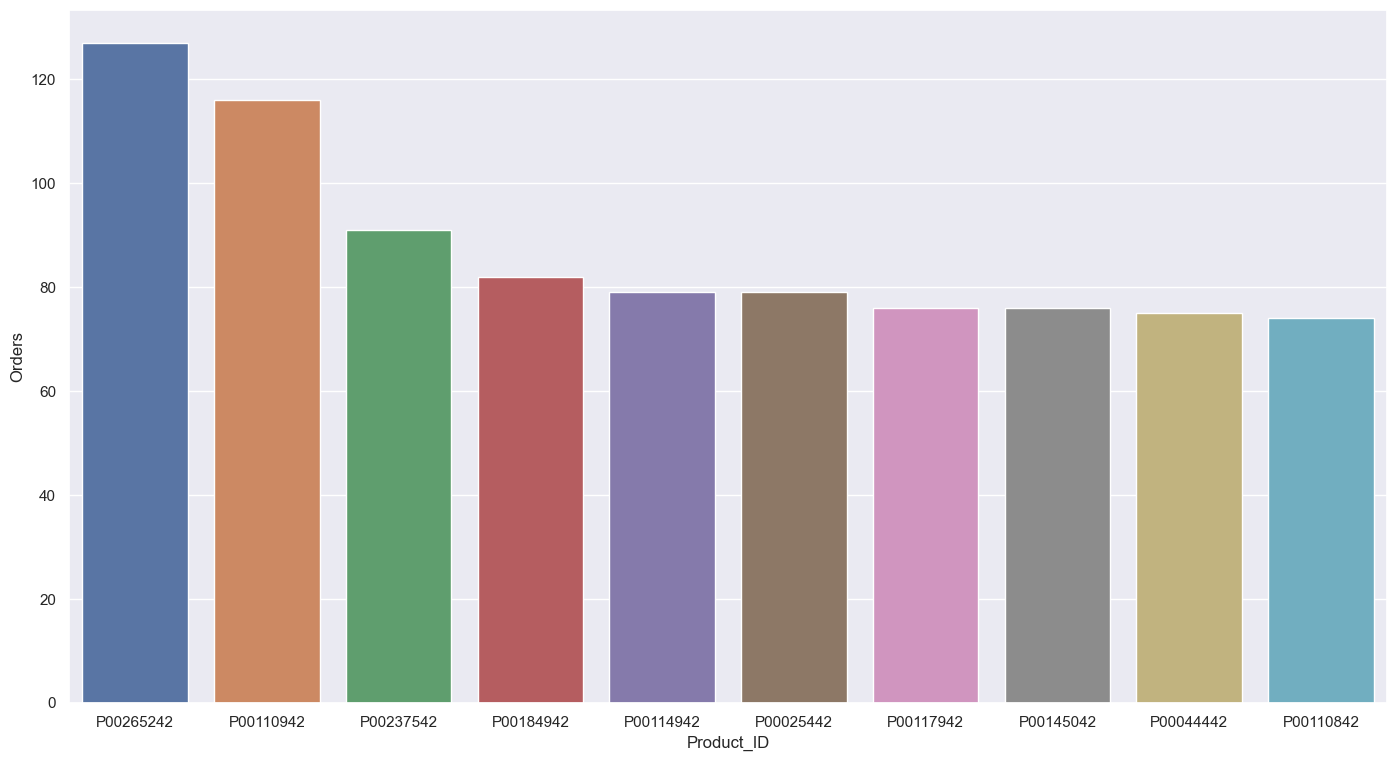

In [248]:
sales_state=dataset.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sbn.barplot(data=sales_state,x='Product_ID',y='Orders')

# Gender wise sales in year

In [131]:
sales_gender_year = dataset.groupby(['Gender', 'Year'])['Amount'].sum().reset_index()

sales_gender_year_filtered = sales_gender_year[sales_gender_year['Year'].isin([2021, 2022])]
sales_pivot = sales_gender_year_filtered.pivot(index='Gender', columns='Year', values='Amount')

sales_pivot

Year,2021,2022
Gender,,
F,53519728,20816125
M,22959072,8954204


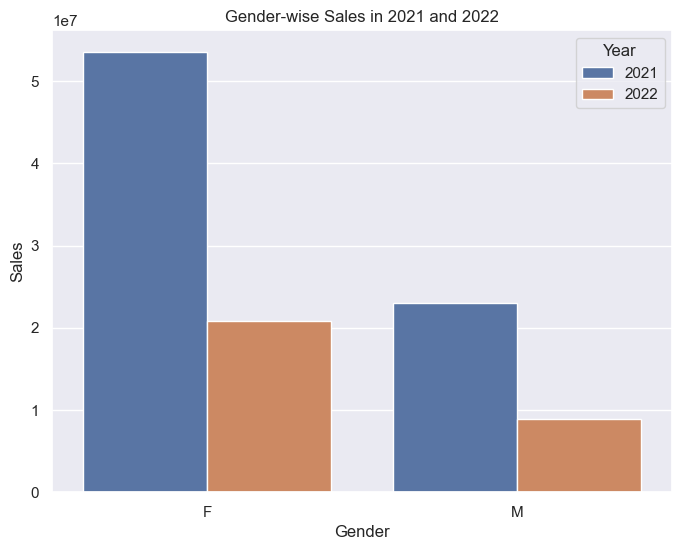

In [126]:
sales_gender_year = dataset.groupby(['Gender', 'Year'])['Amount'].sum().reset_index()
sales_gender_year_filtered = sales_gender_year[sales_gender_year['Year'].isin([2021, 2022])]

plt.figure(figsize=(8, 6))
sbn.barplot(x='Gender', y='Amount', hue='Year', data=sales_gender_year_filtered)
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.title('Gender-wise Sales in 2021 and 2022')
plt.legend(title='Year')
plt.show()

# Conclusion

Married women age group 26-35 years from UP, Maharashtra, and Karnataka working in IT Healthcare and Aviation are more likely to buy product from Food Clothing and Electronics category.In 2021, females spent more money on their own items compared to males.